In [40]:
'''
Preprocess the cosmology targets for the fiber assignment.
'''
from utils.common_imports import np, time, plt, fits, Table, new_colors
from astropy.io import ascii

In [41]:
def write_data(data_table, output_dir='../data_proc/', prefix=None, fmt='fits'):
    '''
    Write the calibration data into file that is ready for netflow.
    '''
    if prefix is None:
        raise ValueError('Give prefix (cos, sky, or star) of data file!')

    # Write the data table
    output_fn = output_dir + prefix + '_targets.' + fmt
    if fmt == 'fits':
        data_table.write(output_fn, format='fits', overwrite=True)
    elif fmt == 'ecsv':
        data_table.write(output_fn, format='ascii.ecsv', overwrite=True)
    else:
        raise ValueError('The format is not supported!')

def plot_radec(dt, title, save_fig=True, output_dir='../output/figures/'):
    '''
    Plot the ra-dec distribution of the data.
    '''
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.set_xlabel('RA [deg]')
    ax.set_ylabel('Dec [deg]')
    ax.set_title(title)
    
    ax.plot(dt['R.A.'], dt['Dec.'], ",", alpha=1., ls='none')

    if save_fig:
        fig.savefig(output_dir + title + '_radec.png')
    plt.show()   
# TO-DO: def data_check() - check the data using plots and functions

# Cosmology targets for testing

In [3]:
t0 = time.time()

# cosmology targets
with fits.open('../data_raw/test/s21a_wide_gal_select.fits', memmap=True) as hdul:
    data_cos = hdul[1].data

ng = len(data_cos)
print(f'There are {ng} cosmology targets.')
print(data_cos.columns)

t1 = time.time()
print(f'Time taken - read data: {t1-t0:.2f} seconds')

# create the data table
data_table = Table()
data_table['ID'] = np.array(['_Cos_'+str(x) for x in data_cos['object_id']])
#FIXME: need to check the column names
data_table['R.A.'] = np.array(data_cos['i_ra'], dtype='float64')
data_table['Dec.'] = np.array(data_cos['i_dec'], dtype='float64')
data_table['Exposure Time'] = np.zeros(ng, dtype='float64') + 900.0 # 900 seconds, 2*7.5 mins
data_table['Priority'] = np.ones(ng, dtype='int32') # only one priority
data_table['stage'] = np.zeros(ng, dtype='int32') # 0 for non-ancillary targets
data_table['AlreadyObserved'] = np.zeros(ng, dtype='int32') # 0: False, 1: True
data_table['PartiallyObserved'] = np.zeros(ng, dtype='int32') # 0: False, 1: True
data_table['otime'] = np.array(["2016-04-03T08:00:00Z"] * ng, dtype='U20') # time of observation in ISO8601 UTC format, e.g."2016-04-03T08:00:00Z"
data_table['TileID'] = np.zeros(ng, dtype='int32') - 1 # default=-1
data_table['TileIDExtraExposure'] = np.zeros(ng, dtype='int32') - 1 # default=-1
data_table['otimeExtraExposure'] = np.empty(ng, dtype='U20')

# mask if there is any
# msk = np.ones(ng, dtype=bool)
# TO-DO: change the ra, dec range; here is a test for 3 hours (12 pointings), 25 de observation
msk = (data_cos['i_ra'] > 330) & (data_cos['i_ra'] < 350) & (data_cos['i_dec'] > -1.5) & (data_cos['i_dec'] < 0.5)

t2 = time.time()
print(f'Time taken - create data_table: {t2-t1:.2f} seconds')

# write the data to fits file
write_data(data_table[msk], prefix='cosmology_region3_3h', output_dir='../data_proc/test/', fmt='fits')

t3 = time.time()
print(f'Time taken - save data_table to fits file: {t3-t2:.2f} seconds')

# write the data to ecsv file
write_data(data_table[msk], prefix='cosmology_region3_3h', output_dir='../data_proc/test/', fmt='ecsv')

t4 = time.time()
print(f'Time taken - save data_table to ecsv file: {t4-t3:.2f} seconds')

There are 7152462 cosmology targets.
ColDefs(
    name = 'object_id'; format = 'K'
    name = 'object_id_isnull'; format = 'L'
    name = 'parent_id'; format = 'K'
    name = 'parent_id_isnull'; format = 'L'
    name = 'tract'; format = 'J'
    name = 'tract_isnull'; format = 'L'
    name = 'patch'; format = 'J'
    name = 'patch_isnull'; format = 'L'
    name = 'i_ra'; format = 'D'
    name = 'i_ra_isnull'; format = 'L'
    name = 'i_dec'; format = 'D'
    name = 'i_dec_isnull'; format = 'L'
    name = 'i_variance_value'; format = 'E'
    name = 'i_variance_value_isnull'; format = 'L'
    name = 'i_footprintarea_value'; format = 'J'
    name = 'i_footprintarea_value_isnull'; format = 'L'
    name = 'a_g'; format = 'E'
    name = 'a_g_isnull'; format = 'L'
    name = 'a_r'; format = 'E'
    name = 'a_r_isnull'; format = 'L'
    name = 'a_i'; format = 'E'
    name = 'a_i_isnull'; format = 'L'
    name = 'a_z'; format = 'E'
    name = 'a_z_isnull'; format = 'L'
    name = 'a_y'; format =

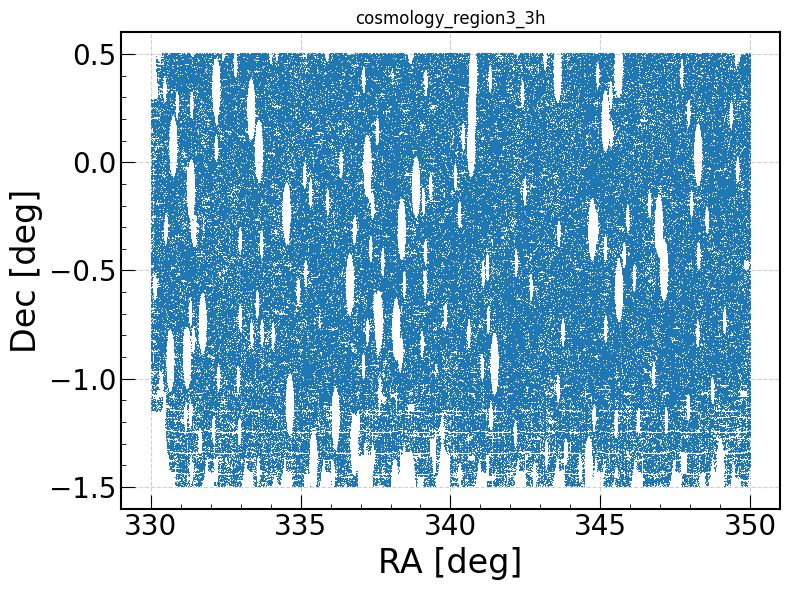

In [5]:
# plot the ra-dec distribution
plot_radec(data_table[msk], title='cosmology_region3_3h', save_fig=True, output_dir="../output/figures/")

# Jan25 targets

<TableColumns names=('ob_code','obj_id','ra','dec','exptime','priority','resolution','reference_arm','g_hsc','g_hsc_err','r2_hsc','r2_hsc_err','i2_hsc','i2_hsc_err','z_hsc','z_hsc_err','y_hsc','y_hsc_err','matched')>
Time taken - read data: 8.81 seconds
There are 3054 priority 1 targets and 196915 priority 2 targets.
Now, there are 65639 priority 2 targets after downsampling.
There are 68693 cosmology targets.
There are 68693 cosmology targets.
Time taken - create data_table: 0.14 seconds
Time taken - save data_table to ecsv file: 233728.39 seconds


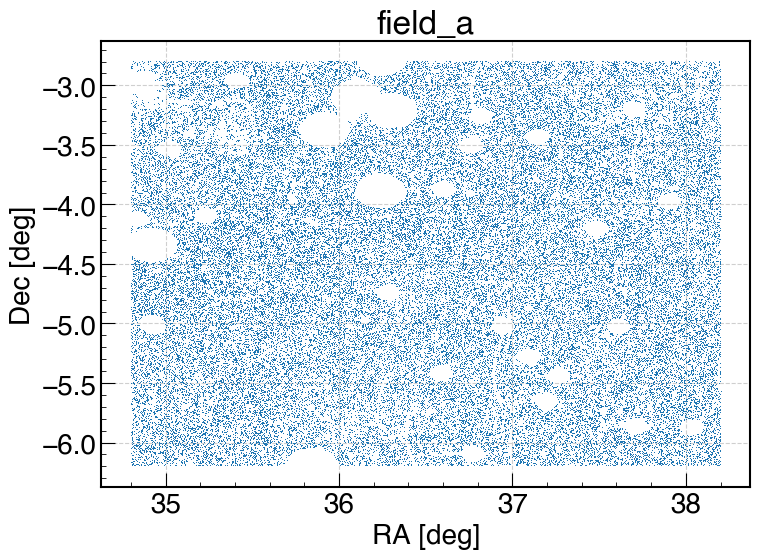

<TableColumns names=('ob_code','obj_id','ra','dec','exptime','priority','resolution','reference_arm','g_hsc','g_hsc_err','r2_hsc','r2_hsc_err','i2_hsc','i2_hsc_err','z_hsc','z_hsc_err','y_hsc','y_hsc_err','matched')>
Time taken - read data: 21.78 seconds
There are 1613 priority 1 targets and 182161 priority 2 targets.
Now, there are 60721 priority 2 targets after downsampling.
There are 62334 cosmology targets.
There are 62334 cosmology targets.
Time taken - create data_table: 0.11 seconds
Time taken - save data_table to ecsv file: 233741.07 seconds


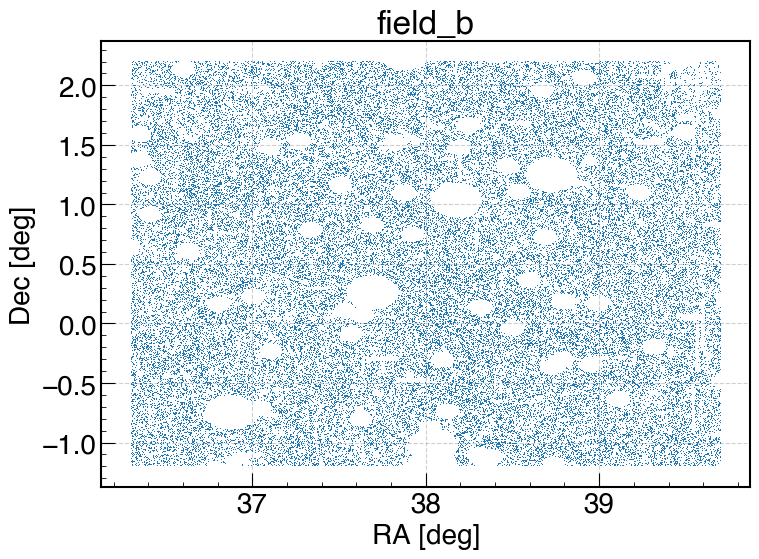

<TableColumns names=('ob_code','obj_id','ra','dec','exptime','priority','resolution','reference_arm','g_hsc','g_hsc_err','r2_hsc','r2_hsc_err','i2_hsc','i2_hsc_err','z_hsc','z_hsc_err','y_hsc','y_hsc_err','matched')>
Time taken - read data: 30.66 seconds
There are 0 priority 1 targets and 158488 priority 2 targets.
Now, there are 52830 priority 2 targets after downsampling.
There are 52830 cosmology targets.
There are 52830 cosmology targets.
Time taken - create data_table: 0.09 seconds
Time taken - save data_table to ecsv file: 233749.79 seconds


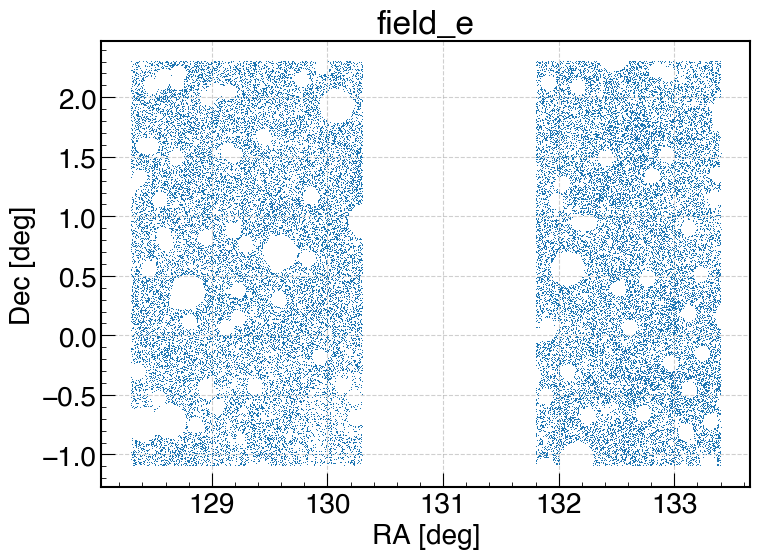

In [42]:
t0 = time.time()

fdir_Jan25 = '../data_raw/Jan25/'
ver = 1
for field in ['a', 'b', 'e']:
    data_cos = ascii.read(fdir_Jan25 + '/cmx_01222025_DESI-ELG_field-{}_v{}.csv'.format(field, ver))
    print(data_cos.columns)

    t1 = time.time()
    print(f'Time taken - read data: {t1-t0:.2f} seconds')

    id_p1 = np.where(data_cos['priority'] == 1)[0]
    id_p2 = np.where(data_cos['priority'] == 2)[0]
    print(f'There are {len(id_p1)} priority 1 targets and {len(id_p2)} priority 2 targets.')

    id_p2 = id_p2[::3]
    print(f'Now, there are {len(id_p2)} priority 2 targets after downsampling.')

    ng = len(id_p1) + len(id_p2)
    print(f'There are {ng} cosmology targets.')

    id_all = np.concatenate([id_p1, id_p2])
    print(f'There are {len(id_all)} cosmology targets.')

    # create the data table
    data_table = Table()
    data_table['ID'] = np.array(['_Cos_'+str(x) for x in data_cos['obj_id'][id_all]])
    #FIXME: need to check the column names
    data_table['R.A.'] = np.array(data_cos['ra'][id_all], dtype='float64')
    data_table['Dec.'] = np.array(data_cos['dec'][id_all], dtype='float64')
    data_table['Exposure Time'] = np.array(data_cos['exptime'][id_all], dtype='float64') # 1800 seconds
    data_table['Priority'] =  np.array(data_cos['priority'][id_all], dtype='int32') # 1 and 2
    data_table['stage'] = np.zeros(ng, dtype='int32') # 0 for non-ancillary targets
    data_table['AlreadyObserved'] = np.zeros(ng, dtype='int32') # 0: False, 1: True
    data_table['PartiallyObserved'] = np.zeros(ng, dtype='int32') # 0: False, 1: True
    data_table['catId'] = np.zeros(ng, dtype='int32') + 11 # 11 | HSC-SSP Public Data Release 4 (Wide) - S21a

    # mask if there is any
    msk = np.ones(ng, dtype=bool)

    t2 = time.time()
    print(f'Time taken - create data_table: {t2-t1:.2f} seconds')

    # write the data to ecsv file
    write_data(data_table[msk], prefix='field_{}'.format(field), output_dir='../data_proc/Jan25/', fmt='ecsv')

    t4 = time.time()
    print(f'Time taken - save data_table to ecsv file: {t4-t3:.2f} seconds')

    # plot the ra-dec distribution
    plot_radec(data_table[msk], title='field_{}'.format(field), save_fig=True, output_dir="../output/Jan25/")


In [43]:
data_table

ID,R.A.,Dec.,Exposure Time,Priority,stage,AlreadyObserved,PartiallyObserved,catId
str22,float64,float64,float64,int32,int32,int32,int32,int32
_Cos_40959015747851684,129.60509132354514,-1.0961330496027266,1800.0,2,0,0,0,11
_Cos_40959015747851946,129.60384831385406,-1.090412052482157,1800.0,2,0,0,0,11
_Cos_40959015747852120,129.57976748016324,-1.0867021154512304,1800.0,2,0,0,0,11
_Cos_40959015747853254,129.5728962303128,-1.062190499248991,1800.0,2,0,0,0,11
_Cos_40959015747854399,129.59540191496652,-1.0385068364886125,1800.0,2,0,0,0,11
_Cos_40959015747854837,129.62428084277093,-1.0292727070751175,1800.0,2,0,0,0,11
_Cos_40959015747855059,129.61033045499062,-1.0246055737740154,1800.0,2,0,0,0,11
_Cos_40959015747870450,129.61573445359983,-1.0957155663807059,1800.0,2,0,0,0,11
_Cos_40959015747870548,129.58085856906376,-1.0912892377556258,1800.0,2,0,0,0,11
